In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
train_data=pd.read_csv("C:/Users/hp/Documents/Machine Learning/Project/Project Files/heart.csv")

In [2]:
train_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [3]:
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
train_data.shape

(1025, 14)

In [5]:
#checking for duplicate values
train_data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [6]:
#checking for missing values
train_data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
#finding outliers
X=train_data.drop(["target"],axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [8]:
df_replace_nan = X.mask(X.sub(X.mean()).div(X.std()).abs().gt(3))

df_replace_nan.isnull().sum().sum() 

56

In [9]:
df_replace_median = df_replace_nan.fillna(df_replace_nan.median())

df_replace_median.isnull().sum().sum() 

0

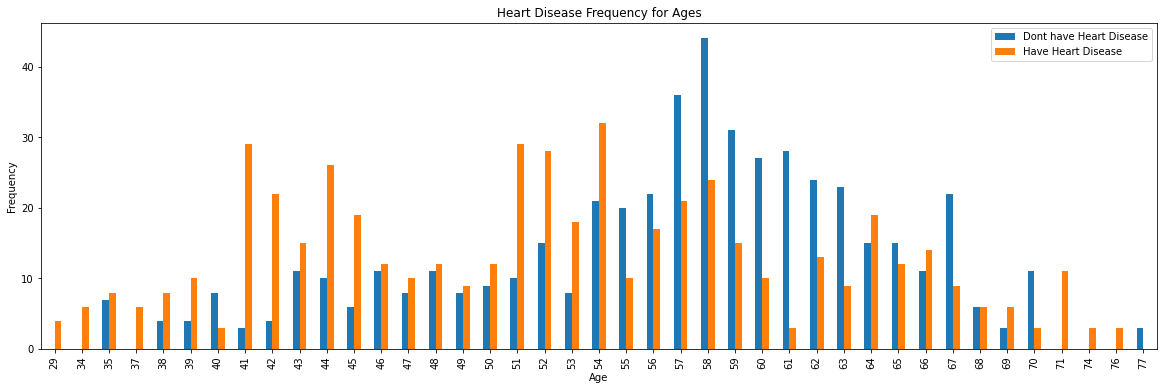

In [10]:
#Data Analysis : Correlation between heart disease and age
pd.crosstab(train_data.age,train_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Dont have Heart Disease", "Have Heart Disease"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

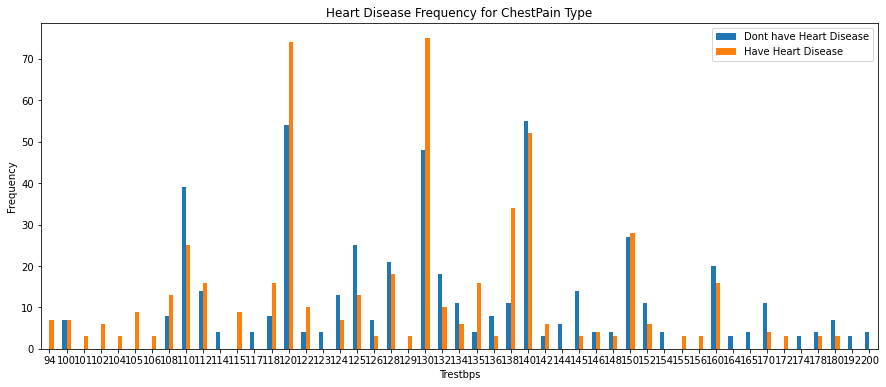

In [11]:
#Data Analysis : Correlation between heart disease and trestbps
pd.crosstab(train_data.trestbps,train_data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for resting blood pressure')
plt.xlabel('Trestbps')
plt.xticks(rotation=0)
plt.legend(["Dont have Heart Disease", "Have Heart Disease"])
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndtrestbps.png')
plt.show()

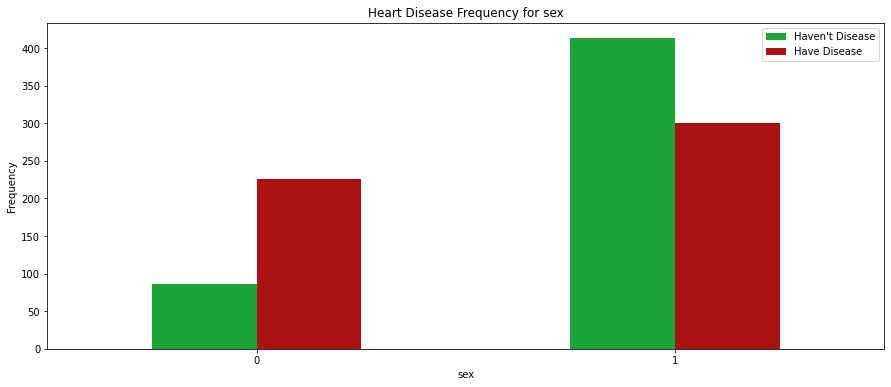

In [29]:
#Data Analysis : Correlation between heart disease and sex
# 0 - female
# 1 - male
pd.crosstab(train_data.sex,train_data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('sex')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

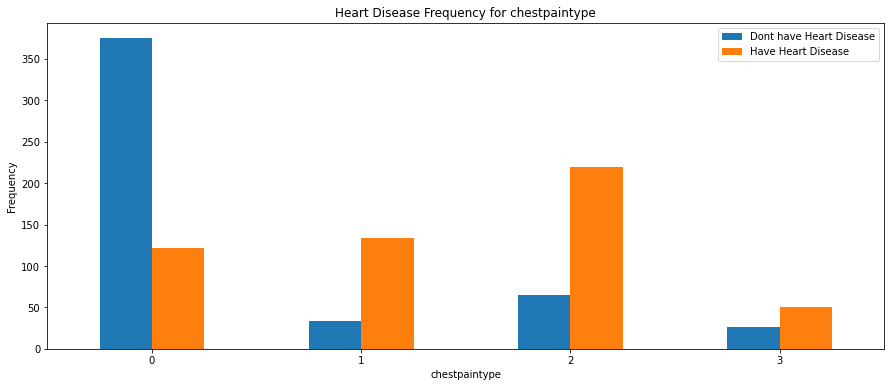

In [32]:
#Data Analysis : Correlation between heart disease and chestpaintype
pd.crosstab(train_data.cp,train_data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for chestpaintype')
plt.xlabel('chestpaintype')
plt.xticks(rotation=0)
plt.legend(["Dont have Heart Disease", "Have Heart Disease"])
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndchestpaintype.png')
plt.show()

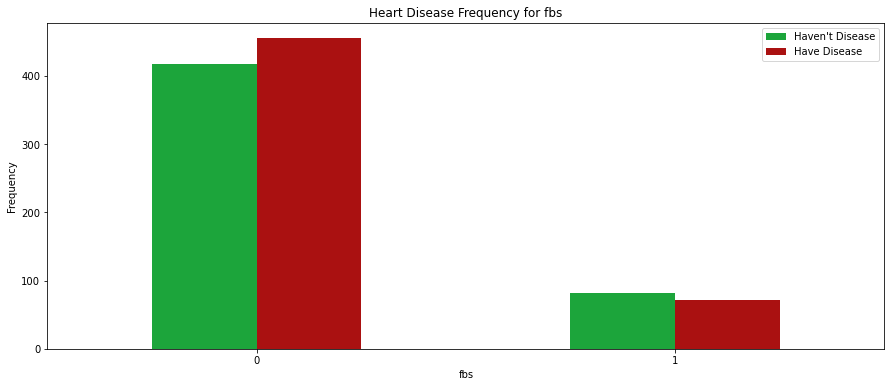

In [13]:
#Data Analysis : Correlation between heart disease and fbs
pd.crosstab(train_data.fbs,train_data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for fbs')
plt.xlabel('fbs')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.XTick at 0x1a81f4c4790>,
 [Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

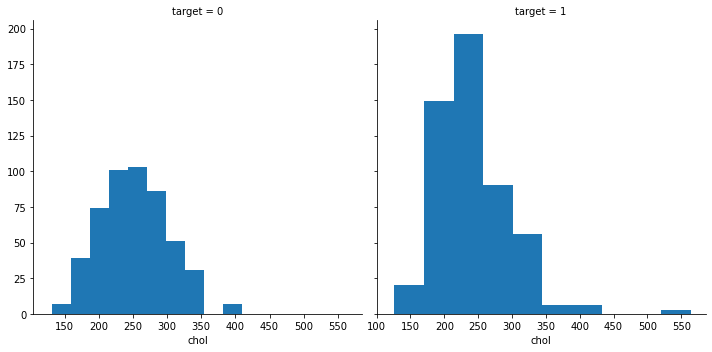

In [16]:
#Data Analysis : Correlation between heart disease and chol
import seaborn as sns
import matplotlib.pyplot as plt
grid=sns.FacetGrid(train_data, col ='target', size=5)
grid.map(plt.hist,"chol")
plt.xticks(range(100,600,50))

In [17]:
train_data[['restecg', 'target']].groupby(['restecg']).mean()

,target
restecg,
0,0.430584
1,0.602339
2,0.200000


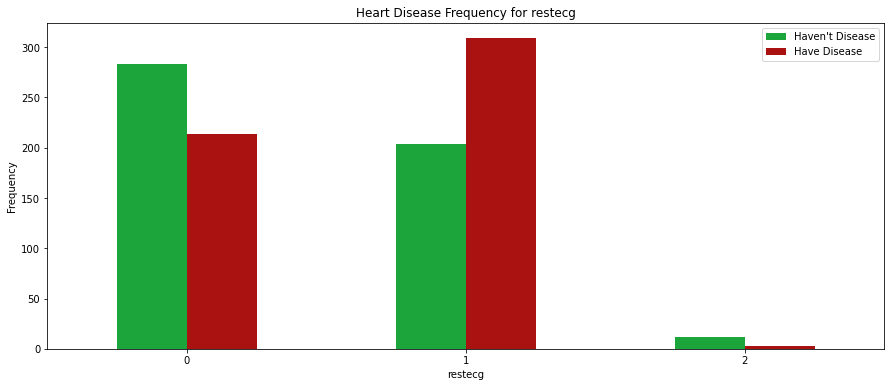

In [19]:
#Data Analysis : Correlation between heart disease and restecg
pd.crosstab(train_data.restecg,train_data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for restecg')
plt.xlabel('restecg')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

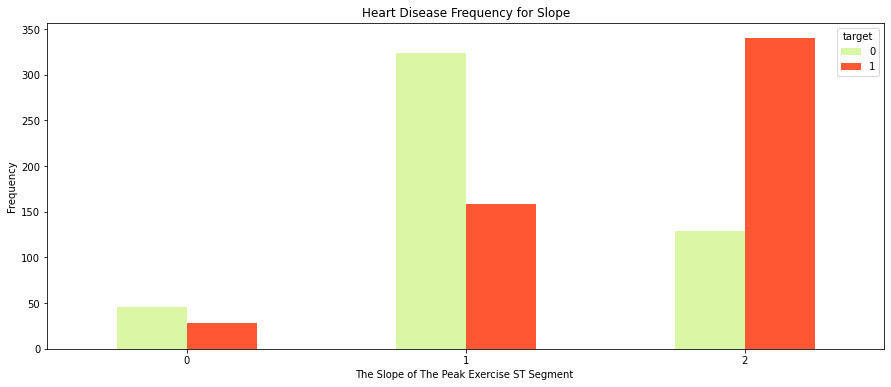

In [22]:
#Data Analysis : Correlation between heart disease and Slope of The Peak Exercise ST Segment
pd.crosstab(train_data.slope,train_data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

In [24]:
categorical=train_data[["slope","ca","thal"]]

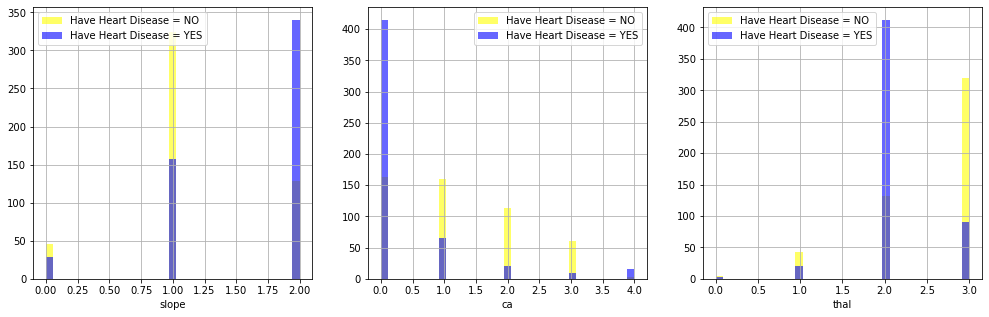

In [25]:
#Data Analysis : Correlation between heart disease and Slope of The Peak Exercise ST Segment, ca and thal
plt.figure(figsize=(17, 17))
for i, column in enumerate(categorical, 1):
    plt.subplot(3, 3, i)
    train_data[train_data["target"] == 0][column].hist(bins=35, color='yellow', label='Have Heart Disease = NO', alpha=0.6)
    train_data[train_data["target"] == 1][column].hist(bins=35, color='blue', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [26]:
train_data[['exang', 'target']].groupby(['exang']).mean()

,target
exang,
0,0.669118
1,0.205797


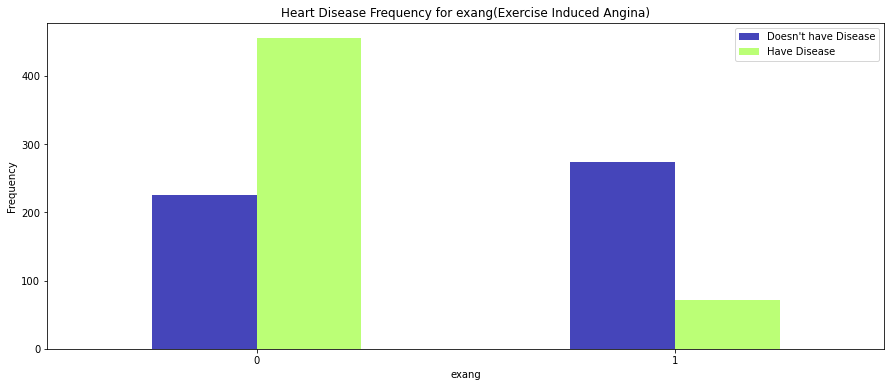

In [28]:
#Data Analysis : Correlation between heart disease and exang
pd.crosstab(train_data.exang,train_data.target).plot(kind="bar",figsize=(15,6),color=['#4545ba','#bbff76' ])
plt.title('Heart Disease Frequency for exang(Exercise Induced Angina)')
plt.xlabel('exang')
plt.xticks(rotation=0)
plt.legend(["Doesn't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

(14.5, -0.5)

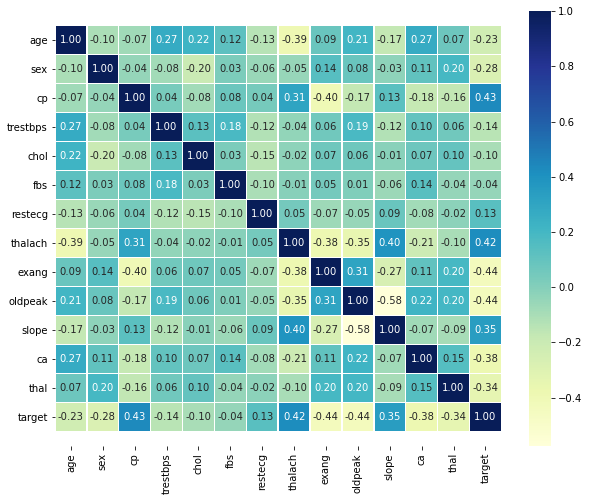

In [33]:
corr_matrix = train_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

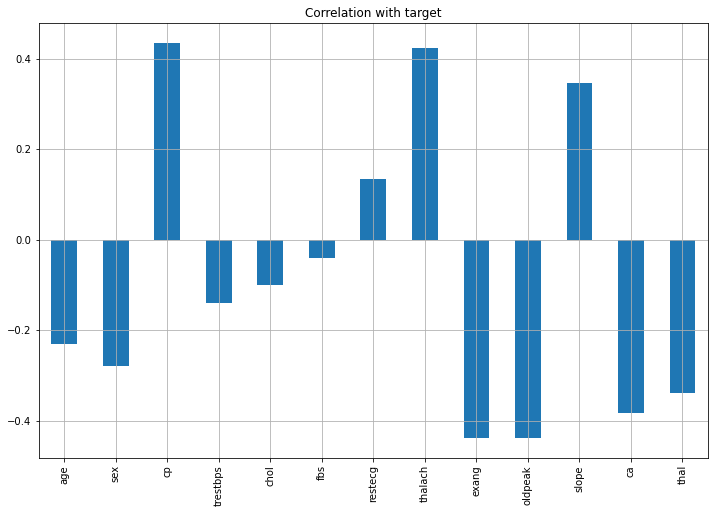

In [34]:
train_data.drop('target', axis=1).corrwith(train_data.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [35]:
#splitting training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data.loc[:, train_data.columns != 'target'], train_data['target'], 
                 test_size = 0.3, random_state=66)

In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [38]:
#Decision tree without tuning
InputFeatures = ['age','sex','cp','trestbps','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
train_df = train_data[InputFeatures]

clf = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=0)
clf.fit(x_train, y_train)

print_score(clf, x_train, y_train, x_test, y_test, train=True)
print_score(clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 87.59%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.850949    0.902299  0.875872    0.876624      0.877376
recall       0.902299    0.850949  0.875872    0.876624      0.875872
f1-score     0.875872    0.875872  0.875872    0.875872      0.875872
support    348.000000  369.000000  0.875872  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[314  34]
 [ 55 314]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.832298    0.884354  0.857143    0.858326      0.858833
recall       0.887417    0.828025  0.857143    0.857721      0.857143
f1-score     0.858974    0.855263  0.857143    0.857119      0.857083
support    151.000000  157.000000  0.857143  308.000000    308.

In [39]:
#Hyperparameter tuning of Decision tree
from sklearn.model_selection import GridSearchCV
params = {"criterion": ["gini", "entropy"],
           "min_samples_split": [2, 10],
           "max_depth": [1,2,3,4,5,6,7],
           "min_samples_leaf":list(range(1, 9)),
           "splitter":("best", "random"),
           "max_features": ("auto","sqrt","log2")
               }

tree_clf = DecisionTreeClassifier(random_state=42) 
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", cv=5)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)

print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Best_params: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 96.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.976471    0.957560  0.966527    0.967015      0.966738
recall       0.954023    0.978320  0.966527    0.966171      0.966527
f1-score     0.965116    0.967828  0.966527    0.966472      0.966512
support    348.000000  369.000000  0.966527  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[332  16]
 [  8 361]]

Test Result:
Accuracy Score: 95.13%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.953333    0.949367  0.951299    0.951350      0.951312
recall       0.947020    0.955414  0.951299    0.951217      

In [40]:
#best parameter of the decision tree giving best accuracy
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [57]:
target=train_data['target']
data = train_data.drop(['target'],axis=1)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=10)

In [60]:
#random forest without hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
classifierRF=RandomForestClassifier()
classifierRF.fit(x_train,y_train)
acc=classifierRF.score(x_test, y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 96.10%


In [61]:
data1=train_data.drop(['fbs', 'chol'], axis=1)
target1=train_data['target']
data1 = train_data.drop(['target'],axis=1)

In [62]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data1, target1, test_size=0.3, random_state=10)

In [63]:
classifierRF1=RandomForestClassifier()
classifierRF1.fit(x_train1,y_train1)
accuracy=classifierRF1.score(x_test1, y_test1)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(accuracy))

Random Forest Algorithm Accuracy Score : 96.10%


In [64]:
from sklearn.model_selection import GridSearchCV
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(x_train1, y_train1)
random_forest.fit(x_train1, y_train1)
acc_random_forest = round(random_forest.score(x_train1, y_train1) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

100.0 {'n_estimators': 100}


In [65]:
acc_test_random_forest = round(random_forest.score(x_test1, y_test1) * 100, 2)
acc_test_random_forest

96.1

In [66]:
rfc=RandomForestClassifier(random_state=42)

In [67]:
param_grid = { 
    'n_estimators': [400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,9],
    'criterion' :['gini', 'entropy']
}

In [68]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [400, 500]})

In [69]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 400}

In [70]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 400, max_depth=9, criterion='gini')

In [71]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=400, random_state=42)

In [72]:
pred1=rfc1.predict(x_test)

In [73]:
print("Accuracy for Random Forest is: ",accuracy_score(y_test,pred1))

Accuracy for Random Forest is:  0.961038961038961


In [74]:
#Bagging
from sklearn.ensemble import BaggingClassifier
classifierBa= BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=50)
classifierBa.fit(x_train,y_train)
classifierBa.score(x_test, y_test)

0.9448051948051948

In [75]:
y_preds = classifierBa.predict(x_test)
print("bagging_accuracy score: ",accuracy_score(y_test, y_preds))

bagging_accuracy score:  0.9448051948051948


In [76]:
Y_pred = classifierBa.predict(x_test).astype(int)
acc_bagging_classifier = round(classifierBa.score(x_train, y_train) * 100, 2)
acc_bagging_classifier

99.72

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [78]:
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)

[[146   7]
 [ 10 145]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


<ipython-input-79-c487956049bc>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-79-c487956049bc>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


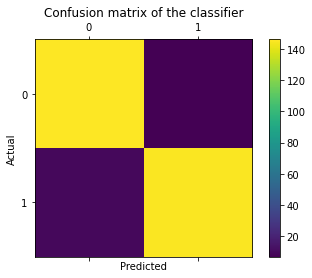

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       153
           1       0.95      0.94      0.94       155

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308



In [81]:
classifierBagging= BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=50)
classifierBagging.fit(x_train1,y_train1)
classifierBagging.score(x_test1, y_test1)

0.9545454545454546

In [82]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 10, 15, 25, 30]
max_samples = [5, 10, 25, 50, 100,500]
max_features = [1, 2, 5, 10, 13]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(classifierBa, hyperbag, cv = 5, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  6.6min finished


In [83]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridbag.best_params_)

The best hyper parameters are:
 {'max_features': 5, 'max_samples': 500, 'n_estimators': 1200}


In [84]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
bagg1 = BaggingClassifier(max_features=5, max_samples=500,n_estimators= 100)
bagg1.fit(x_train,y_train)
pred_bagg1 = bagg1.predict(x_test)

In [85]:
#Checking different metrics for bagging model after tuning the hyperparameters
print('Checking different metrics for bagging model after tuning the hyperparameters:\n')
print("Training accuracy: ",bagg1.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_bagg1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_bagg1)
print('Confusion Matrix: \n',conf_mat)

class_rep2 = classification_report(y_test,pred_bagg1)
print('Classification Report: \n',class_rep2)

Checking different metrics for bagging model after tuning the hyperparameters:

Training accuracy:  0.99860529986053
Testing accuracy:  0.9545454545454546
Confusion Matrix: 
 [[149   4]
 [ 10 145]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       153
           1       0.97      0.94      0.95       155

    accuracy                           0.95       308
   macro avg       0.96      0.95      0.95       308
weighted avg       0.96      0.95      0.95       308



In [86]:
#AdaBoost
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

Train scores are: 
>10 0.845 (0.046)
Test scores are: 
>10 0.846 (0.064)
Train scores are: 
>50 0.899 (0.033)
Test scores are: 
>50 0.837 (0.055)
Train scores are: 
>100 0.924 (0.023)
Test scores are: 
>100 0.859 (0.059)
Train scores are: 
>200 0.961 (0.018)
Test scores are: 
>200 0.865 (0.045)
Train scores are: 
>500 0.983 (0.014)
Test scores are: 
>500 0.866 (0.050)
Train scores are: 
>700 0.980 (0.015)
Test scores are: 
>700 0.861 (0.045)
Train scores are: 
>1000 0.978 (0.016)
Test scores are: 
>1000 0.863 (0.055)


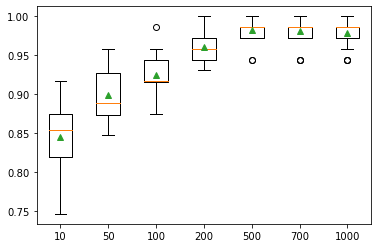

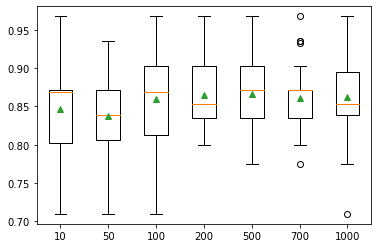

In [87]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    n_trees = [10, 50, 100, 200, 500, 700, 1000]
    for n in n_trees:
            models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results_train, names = list(), list()
results_test, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, x_train, y_train)
    scores1 = evaluate_model(model, x_test, y_test)
    # store the results
    results_train.append(scores)
    results_test.append(scores1)
    names.append(name)
    # summarize the performance along the way
    print("Train scores are: ")
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    print("Test scores are: ")
    print('>%s %.3f (%.3f)' % (name, mean(scores1), std(scores1)))
# plot model performance for comparison

pyplot.boxplot(results_train, labels=names, showmeans=True)
pyplot.show()
pyplot.boxplot(results_test, labels=names, showmeans=True)
pyplot.show()

>0.100 0.861 (0.074)
>0.200 0.858 (0.067)
>0.300 0.852 (0.069)
>0.400 0.853 (0.064)
>0.500 0.849 (0.062)
>0.600 0.845 (0.062)
>0.700 0.836 (0.061)
>0.800 0.835 (0.071)
>0.900 0.835 (0.064)
>1.000 0.837 (0.055)
>1.100 0.843 (0.049)
>1.200 0.833 (0.067)
>1.300 0.841 (0.072)
>1.400 0.848 (0.066)
>1.500 0.855 (0.053)
>1.600 0.856 (0.064)
>1.700 0.855 (0.065)
>1.800 0.848 (0.057)
>1.900 0.833 (0.071)
>2.000 0.586 (0.172)


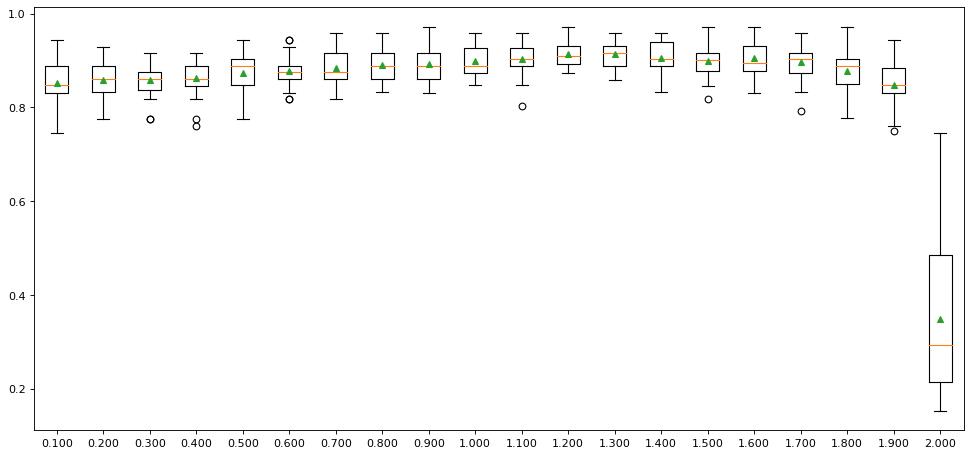

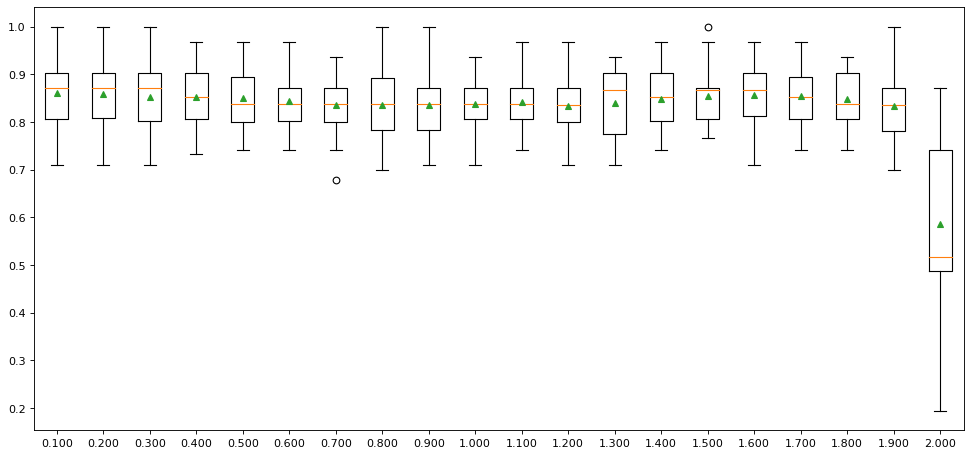

In [88]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from numpy import arange

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


models = get_models()
# evaluate the models and store results
results_train, names = list(), list()
results_test, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, x_train, y_train)
    scores1 = evaluate_model(model, x_test, y_test)
    # store the results
    results_train.append(scores)
    results_test.append(scores1)
    names.append(name)
    #summarize the performance along the way
    #print("Train scores are: ")
    #print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    #print("Test scores are: ")
    print('>%s %.3f (%.3f)' % (name, mean(scores1), std(scores1)))
    
# plot model performance for comparison
plt.figure(num=1, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
pyplot.boxplot(results_train, labels=names, showmeans=True)
pyplot.show()
plt.figure(num=1, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
pyplot.boxplot(results_test, labels=names, showmeans=True)
pyplot.show()

Train scores are: 
>DecisionTreeClassifier(max_depth=2) 0.981 (0.020)
Test scores are: 
>DecisionTreeClassifier(max_depth=2) 0.877 (0.062)
Train scores are: 
>SVC(kernel='linear', probability=True) 0.704 (0.069)
Test scores are: 
>SVC(kernel='linear', probability=True) 0.699 (0.132)
Train scores are: 
>SVC(probability=True) 0.550 (0.043)
Test scores are: 
>SVC(probability=True) 0.651 (0.092)
Train scores are: 
>LogisticRegression() 0.837 (0.054)
Test scores are: 
>LogisticRegression() 0.843 (0.074)


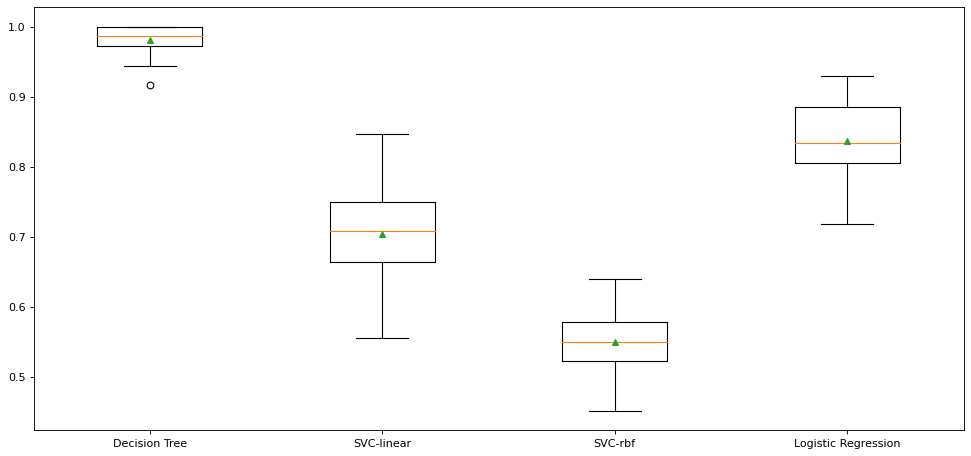

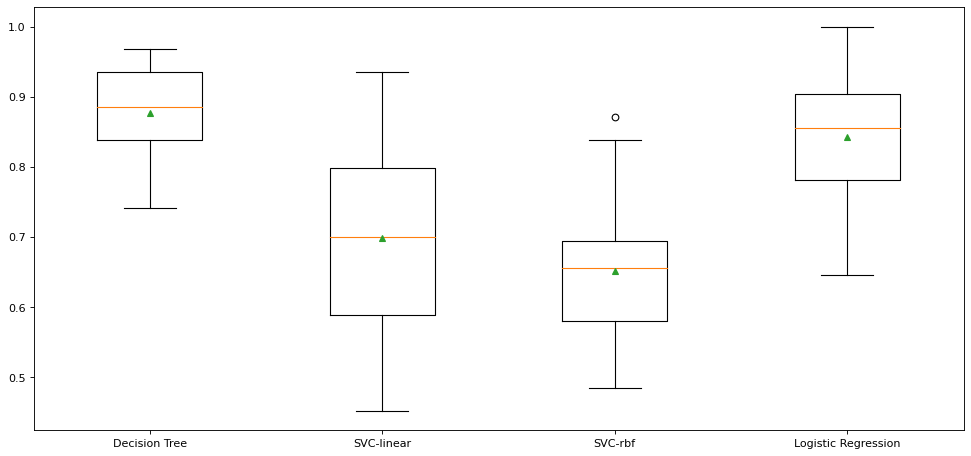

In [89]:
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    svcl=SVC(probability=True, kernel='linear')
    svcr=SVC(probability=True, kernel='rbf')
    dt=DecisionTreeClassifier(max_depth=2)
    lr=LogisticRegression()
    bestimator=[dt,svcl,svcr,lr]
    for i in bestimator:
            models[str(i)] = AdaBoostClassifier(base_estimator=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results_train, names = list(), list()
results_test, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, x_train, y_train)
    scores1 = evaluate_model(model, x_test, y_test)
    # store the results
    results_train.append(scores)
    results_test.append(scores1)
    names.append(name)
    # summarize the performance along the way
    print("Train scores are: ")
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    print("Test scores are: ")
    print('>%s %.3f (%.3f)' % (name, mean(scores1), std(scores1)))
# plot model performance for comparison
plt.figure(num=1, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
pyplot.boxplot(results_train, labels=['Decision Tree','SVC-linear','SVC-rbf','Logistic Regression'], showmeans=True)
pyplot.show()
plt.figure(num=1, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
pyplot.boxplot(results_test, labels=['Decision Tree','SVC-linear','SVC-rbf','Logistic Regression'], showmeans=True)
pyplot.show()

In [90]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
ada_boost = AdaBoostClassifier(n_estimators=700, learning_rate=0.1, random_state=0)

# Train Adaboost Classifer
ada_boost.fit(x_train, y_train)


print_score(ada_boost, x_train, y_train, x_test, y_test, train=True)
print_score(ada_boost, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 93.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.938235    0.928382  0.933054    0.933309      0.933137
recall       0.921965    0.943396  0.933054    0.932681      0.933054
f1-score     0.930029    0.935829  0.933054    0.932929      0.933030
support    346.000000  371.000000  0.933054  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[319  27]
 [ 21 350]]

Test Result:
Accuracy Score: 92.21%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.916129    0.928105  0.922078    0.922117      0.922156
recall       0.928105    0.916129  0.922078    0.922117      0.922078
f1-score     0.922078    0.922078  0.922078    0.922078      0.922078
support    153.000000  155.000000  0.922078  308.000000    308.

In [91]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
classifierLR=LogisticRegression()
classifierLR.fit(x_train,y_train)
classifierLR.score(x_test, y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8668831168831169

In [92]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.852582 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.843245 (0.054096) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.845618 (0.051366) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.844171 (0.053439) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.843245 (0.054096) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.844171 (0.054156) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.845162 (0.049203) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.850222 (0.053202) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [98]:
lr=LogisticRegression(C= 1.0, penalty= 'l2', solver= 'liblinear')

In [99]:
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [100]:
preds = grid_search.predict(x_test)

In [101]:
from sklearn.metrics import confusion_matrix, classification_report
labels=[0,1]
cmx=confusion_matrix(y_test, preds)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test,preds))

[[124  29]
 [ 15 140]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       153
           1       0.83      0.90      0.86       155

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [102]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifierNB=MultinomialNB()
classifierNB.fit(x_train,y_train)
classifierNB.score(x_test, y_test)

0.7597402597402597

In [103]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
acc_gaussian = round(gaussian.score(x_train,y_train ) * 100, 2)
acc_gaussian

82.98

In [104]:
acc_test_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
acc_test_gaussian

83.12

In [105]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=params_NB, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836757 using {'var_smoothing': 5.3366992312063123e-05}
0.640539 (0.060315) with: {'var_smoothing': 1.0}
0.647985 (0.059787) with: {'var_smoothing': 0.8111308307896871}
0.653071 (0.062596) with: {'var_smoothing': 0.657933224657568}
0.662826 (0.061780) with: {'var_smoothing': 0.533669923120631}
0.664228 (0.062311) with: {'var_smoothing': 0.43287612810830584}
0.670253 (0.060929) with: {'var_smoothing': 0.3511191734215131}
0.672568 (0.063769) with: {'var_smoothing': 0.2848035868435802}
0.674400 (0.067335) with: {'var_smoothing': 0.23101297000831597}
0.679956 (0.069674) with: {'var_smoothing': 0.1873817422860384}
0.682270 (0.070519) with: {'var_smoothing': 0.15199110829529336}
0.682270 (0.070519) with: {'var_smoothing': 0.12328467394420659}
0.681338 (0.067567) with: {'var_smoothing': 0.1}
0.684598 (0.068774) with: {'var_smoothing': 0.08111308307896872}
0.689234 (0.070066) with: {'var_smoothing': 0.0657933224657568}
0.691093 (0.069882) with: {'var_smoothing': 0.0533669923120631}
0.69

In [107]:
grid_result.best_params_

{'var_smoothing': 5.3366992312063123e-05}

In [108]:
nb = GaussianNB(var_smoothing=5.3366992312063123e-05)
nb.fit(x_train,y_train)

GaussianNB(var_smoothing=5.3366992312063123e-05)

In [109]:
labels=[0,1]
cmx_n=confusion_matrix(y_test, preds,labels)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test,preds))

[[124  29]
 [ 15 140]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       153
           1       0.83      0.90      0.86       155

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [110]:
#SVM
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)

print("Accuracy of SVM Algo: {:.2f}".format(svm.score(x_test,y_test)*100))

Accuracy of SVM Algo: 84.42


In [111]:
pred = svm.predict(x_test)
pred[:10]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [112]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}
 
svc_grd_srch = SVC(kernel="rbf")

clf = GridSearchCV(svc_grd_srch, param_grid=parameters, scoring='accuracy')

clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [113]:
best_C_Value= 100
best_gamma_Value = 0.01
final_svm= SVC(kernel='rbf', C=best_C_Value, gamma=best_gamma_Value)
final_svm.fit(x_train, y_train)

SVC(C=100, gamma=0.01)

In [114]:
preds = final_svm.predict(x_test)

In [115]:
#KNN
def knnprediction(k, x_train, y_train, x_test):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    return pred

In [117]:
from sklearn.neighbors import KNeighborsClassifier
error_mean = []
for k in range(1, 41):
    pred_i = knnprediction(k, x_train, y_train, x_test)
    error_mean.append(np.mean(pred_i != y_test))

In [120]:
# Let's use 10% of the training data for validation
x_train, Val_data, y_train, val_labels = train_test_split(x_train, y_train, test_size = 0.3, random_state = 84)

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)
predictions = model.predict(Val_data)
print("Evaluation on the testing data: \n")
print(classification_report(val_labels, predictions))
print("Confusion Matrix: \n")
print(confusion_matrix(val_labels, predictions))

Evaluation on the testing data: 

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       116
           1       0.89      0.93      0.91       100

    accuracy                           0.92       216
   macro avg       0.92      0.92      0.92       216
weighted avg       0.92      0.92      0.92       216

Confusion Matrix: 

[[105  11]
 [  7  93]]


In [126]:
from sklearn.neighbors  import KNeighborsClassifier
import sklearn.metrics as metrics
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
# print("Y_prediction: ", y_predict)

test_accuracy = metrics.accuracy_score(y_test, y_predict)
test_accuracy = test_accuracy * 100
print("\nAccuracy of the testing dataset: %.4f" % test_accuracy, "%")


Accuracy of the testing dataset: 91.2338 %


In [128]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.Collecting mlxtend



In [133]:
Y=train_data['target']
X = train_data.drop(['target'],axis=1)

In [134]:
#Stack Regressor
from mlxtend.classifier import StackingCVClassifier
from sklearn import model_selection


sclf = StackingCVClassifier(classifiers=[tree_clf,rfc1, bagg1, ada_boost, nb, final_svm, knn], 
                          meta_classifier=lr)

print('5-fold cross validation:\n')

for clf, label in zip([tree_clf, rfc1, bagg1, ada_boost, nb, final_svm, knn, lr], 
                      ['Decision Tree,'
                       'Random Forest', 
                       'Bagging',
                       'AdaBoost',
                       'Naive Bayes',
                       'SVM',
                       'KNearest Neighbors',
                       'MetaClassifier']):

    sclf_scores = model_selection.cross_val_score(clf, X, Y,
                                              cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (sclf_scores.mean(), sclf_scores.std(), label))

5-fold cross validation:

Accuracy: 0.91 (+/- 0.02) [Decision Tree,Random Forest]
Accuracy: 0.99 (+/- 0.01) [Bagging]
Accuracy: 0.99 (+/- 0.01) [AdaBoost]
Accuracy: 0.90 (+/- 0.02) [Naive Bayes]
Accuracy: 0.84 (+/- 0.03) [SVM]
Accuracy: 0.99 (+/- 0.01) [KNearest Neighbors]
Accuracy: 0.98 (+/- 0.01) [MetaClassifier]
